In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data = pd.read_csv("listing.csv")

data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,2.020000e+13,06-09-2023,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1.0,0.0,1.0,0.0,1.45
1,93015,https://www.airbnb.com/rooms/93015,2.020000e+13,06-09-2023,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1.0,1.0,0.0,0.0,0.27
2,13913,https://www.airbnb.com/rooms/13913,2.020000e+13,06-09-2023,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2.0,1.0,1.0,0.0,0.26
3,15400,https://www.airbnb.com/rooms/15400,2.020000e+13,06-09-2023,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1.0,1.0,0.0,0.0,0.56
4,93734,https://www.airbnb.com/rooms/93734,2.020000e+13,07-09-2023,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1.0,0.0,1.0,0.0,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,80123,https://www.airbnb.com/rooms/80123,2.020000e+13,07-09-2023,city scrape,Rental unit in Wandsworth · ★4.91 · 1 bedroom ...,"<b>The space</b><br />Very pretty, self-contai...",It is a safe residential area surrounded by pa...,https://a0.muscache.com/pictures/543661/87e0bc...,432648,...,4.97,4.84,4.90,NaN,f,1.0,1.0,0.0,0.0,1.07
98,80441,https://www.airbnb.com/rooms/80441,2.020000e+13,07-09-2023,previous scrape,Rental unit in Greater London · ★4.81 · 1 bedr...,"Hello lovely people, the flat has just been pa...",NaN,https://a0.muscache.com/pictures/563055/fabea1...,416812,...,4.98,4.91,4.74,NaN,f,1.0,1.0,0.0,0.0,0.60
99,203163,https://www.airbnb.com/rooms/203163,2.020000e+13,06-09-2023,city scrape,Condo in London · ★4.89 · 1 bedroom · 1 bed · ...,The room just had a total mkeover; designed to...,Kennington like Camden is a cross road of Lond...,https://a0.muscache.com/pictures/0d81da23-3461...,460272,...,4.95,4.87,4.83,NaN,f,9.0,6.0,3.0,0.0,0.72
100,81052,https://www.airbnb.com/rooms/81052,2.020000e+13,07-09-2023,previous scrape,Rental unit in London · ★5.0 · 2 bedrooms · 2 ...,A truly unique apartment with a large and brig...,"The restaurants, shops and pubs on Upper Stree...",https://a0.muscache.com/pictures/16532678/bf54...,438948,...,5.00,5.00,5.00,NaN,f,1.0,1.0,0.0,0.0,0.08


# Preprocessing

In [66]:
print(data.describe())

                  id     scrape_id       host_id  host_listings_count  \
count     102.000000  1.020000e+02  1.020000e+02           102.000000   
mean    95861.500000  2.020000e+13  4.174279e+05             2.882353   
std     54950.769032  0.000000e+00  3.097097e+05             3.351648   
min     13913.000000  2.020000e+13  4.175900e+04             1.000000   
25%     45616.250000  2.020000e+13  1.869170e+05             1.000000   
50%     80282.000000  2.020000e+13  3.683335e+05             1.000000   
75%    141064.500000  2.020000e+13  5.509742e+05             3.000000   
max    207912.000000  2.020000e+13  1.954110e+06            12.000000   

       host_total_listings_count  neighbourhood_group_cleansed    latitude  \
count                 102.000000                           0.0  102.000000   
mean                    6.450980                           NaN   51.510036   
std                    15.979955                           NaN    0.047622   
min                     1.0000

In [67]:
# Check for missing values
print(data.isnull().sum())

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  1
calculated_host_listings_count_entire_homes     1
calculated_host_listings_count_private_rooms    1
calculated_host_listings_count_shared_rooms     1
reviews_per_month                               7
Length: 75, dtype: int64


In [68]:
# Convert 'last_scraped' column to datetime format
data['last_scraped'] = pd.to_datetime(data['last_scraped'])

In [69]:
# Fill missing values in numeric columns with median
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [70]:
# Fill missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [71]:
# Check if there are any missing values left
print(data.isnull().sum())

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64


# Data Visualisation

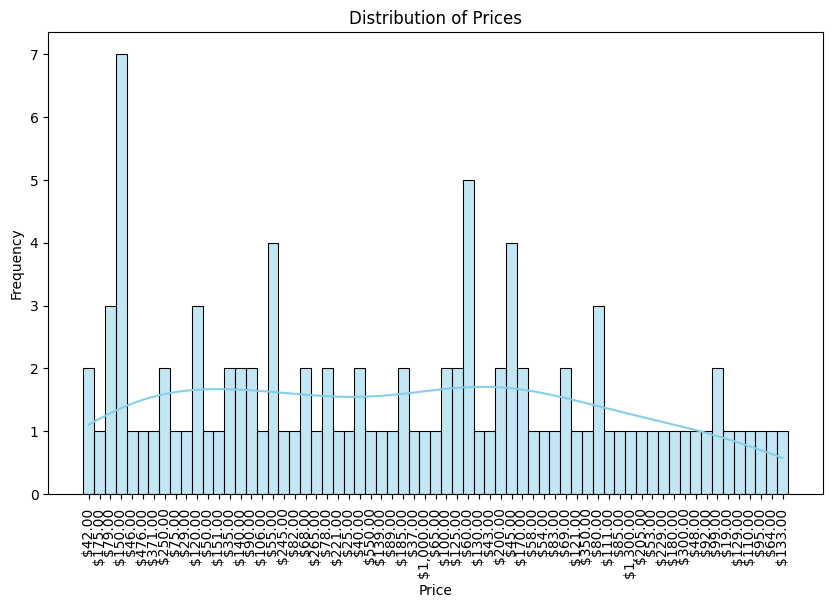

In [72]:
# Plot a histogram of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

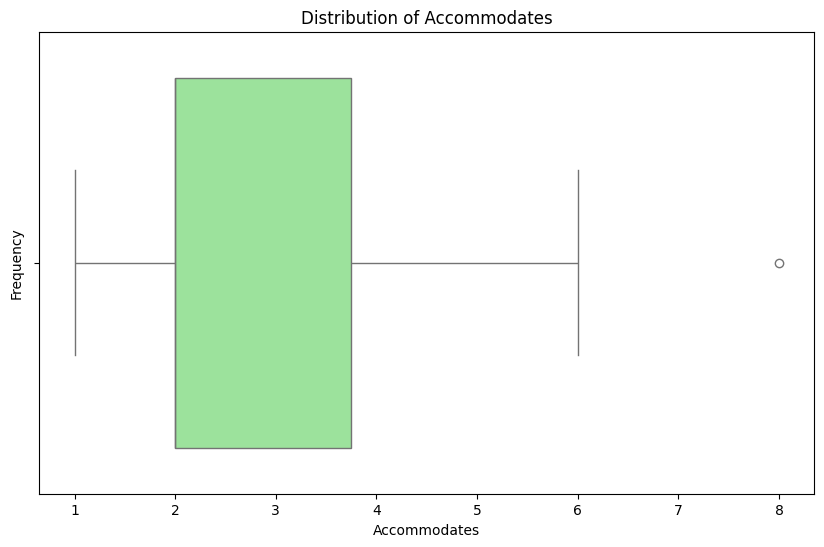

In [73]:
# Plot a boxplot of the 'accommodates' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodates', data=data, color='lightgreen')
plt.title('Distribution of Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()

<ipython-input-74-e61f8cc8cc4d>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['last_review'] = pd.to_datetime(data['last_review'])


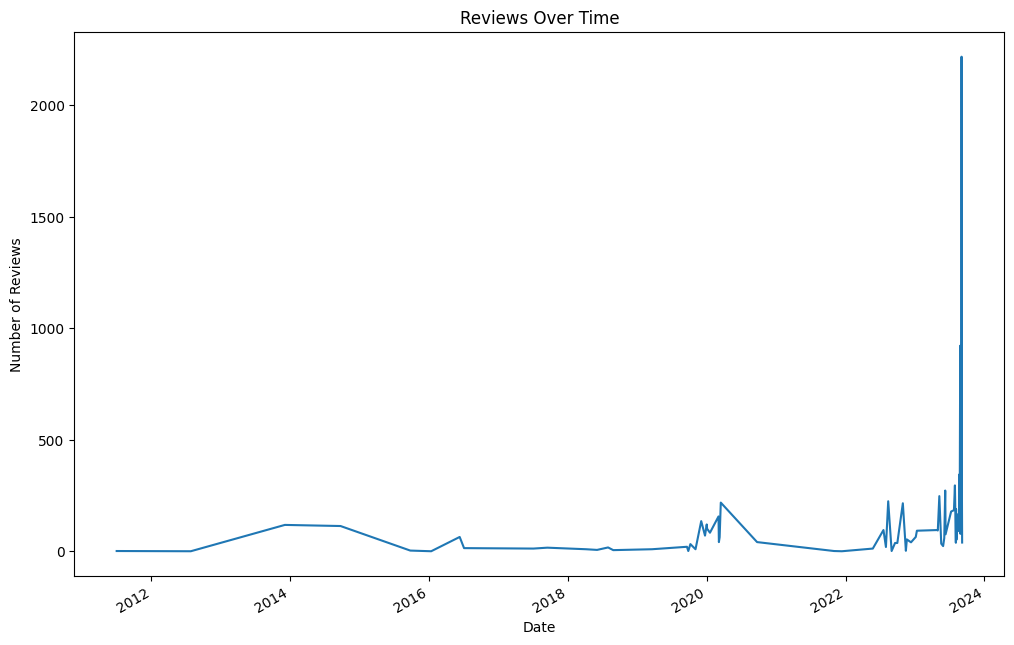

In [74]:
# Convert 'last_review' column to datetime format
data['last_review'] = pd.to_datetime(data['last_review'])

# Plot the time series of reviews over time
plt.figure(figsize=(12, 8))
data.groupby('last_review')['number_of_reviews'].sum().plot()
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


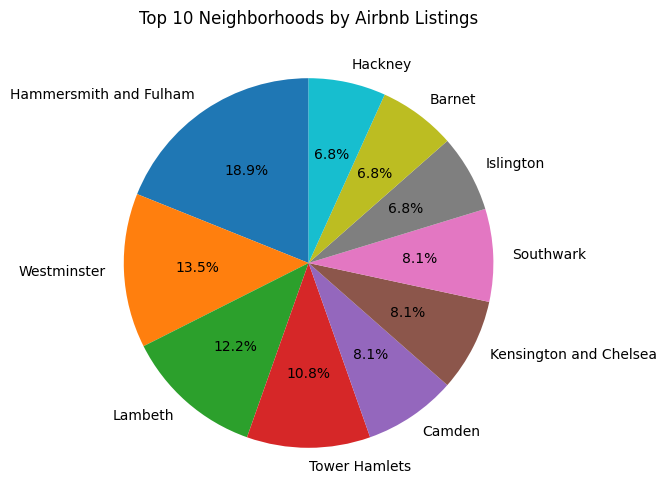

In [75]:
# Plot a pie chart of the top 10 neighborhoods by listing count
top_neighborhoods = data['neighbourhood_cleansed'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_neighborhoods, autopct='%1.1f%%', labels=top_neighborhoods.index, startangle=90)
plt.title('Top 10 Neighborhoods by Airbnb Listings')
plt.show()

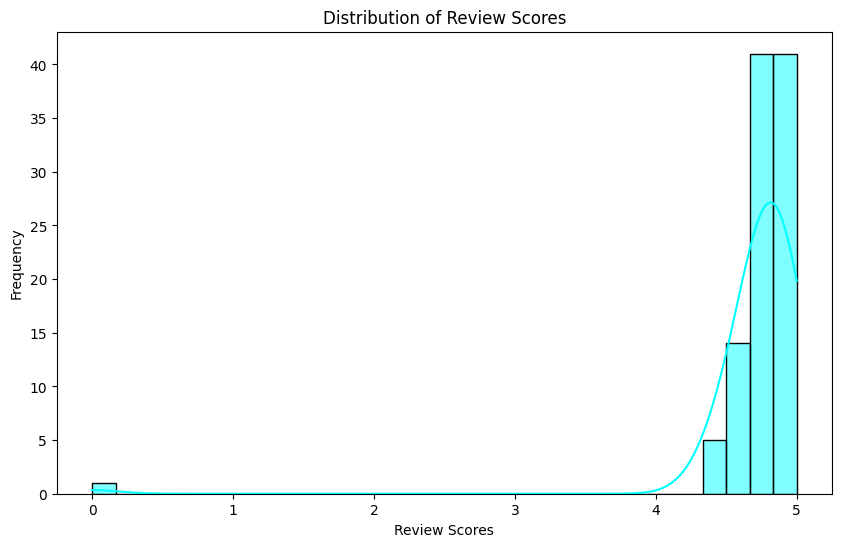

In [76]:
# Plot a histogram of the 'review_scores_rating' column
plt.figure(figsize=(10, 6))
sns.histplot(data['review_scores_rating'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [96]:
data.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Hammersmith and Fulham,14
Westminster,10
Lambeth,9
Tower Hamlets,8
Camden,6
Southwark,6
Kensington and Chelsea,6
Islington,5
Haringey,5


In [99]:
# Remove commas and dollar signs, and convert 'price' column to float
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].astype(float)

# Filter the data for prices between 0 and 600
data = data.loc[(data.price <= 600) & (data.price > 0)]


In [100]:
data.amenities = data.amenities.str.replace("[{}]", "").str.replace('"', "")

In [101]:
data.amenities.head()

0    [Heating, TV with standard cable, Wifi, Smoke ...
1    [Window guards, Bathtub, Hot water kettle, Lau...
2    [Bathtub, Hot water kettle, Laundromat nearby,...
3    [Shampoo, Luggage dropoff allowed, Dryer, Micr...
4    [Window guards, Bathtub, Hot water kettle, Lau...
Name: amenities, dtype: object

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with custom tokenizer
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

# Fit and transform 'amenities' column
amenities = count_vectorizer.fit_transform(data['amenities'])

# Create DataFrame from transformed data
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names_out())

# Drop columns with all zeros
df_amenities = df_amenities.loc[:, (df_amenities != 0).any(axis=0)]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [109]:
columns = ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic', 'instant_bookable']

for c in columns:
    data[c] = data[c].replace('f', 0, regex=True)
    data[c] = data[c].replace('t', 1, regex=True)


In [113]:
for col in data.columns[data.isnull().any()]:
    print(col)

neighborhood_overview
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_neighbourhood
neighbourhood
neighbourhood_group_cleansed
bathrooms
bathrooms_text
bedrooms
beds
calendar_updated
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
license
reviews_per_month


# Model Building

In [132]:
y = data['price']
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [151]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Select only numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize SimpleImputer with median strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train[numeric_cols])

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test[numeric_cols])

# Train a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_imputed, y_train)

# Evaluate the model on the test set
y_pred = rfc.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Print the feature importances
importances = rfc.feature_importances_
for feature, importance in zip(numeric_cols, importances):
    print(f'{feature}: {importance:.3f}')


Accuracy: 0.100
id: 0.039
scrape_id: 0.000
host_id: 0.033
host_is_superhost: 0.010
host_listings_count: 0.019
host_total_listings_count: 0.023
host_has_profile_pic: 0.000
host_identity_verified: 0.006
neighbourhood_group_cleansed: 0.042
latitude: 0.041
longitude: 0.021
accommodates: 0.011
bathrooms: 0.013
bedrooms: 0.025
beds: 0.032
minimum_nights: 0.021
maximum_nights: 0.025
minimum_minimum_nights: 0.022
maximum_minimum_nights: 0.023
minimum_maximum_nights: 0.025
maximum_maximum_nights: 0.021
minimum_nights_avg_ntm: 0.019
maximum_nights_avg_ntm: 0.023
calendar_updated: 0.019
availability_30: 0.026
availability_60: 0.032
availability_90: 0.020
availability_365: 0.019
number_of_reviews: 0.030
number_of_reviews_ltm: 0.037
number_of_reviews_l30d: 0.036
review_scores_rating: 0.031
review_scores_accuracy: 0.034
review_scores_cleanliness: 0.039
review_scores_checkin: 0.033
review_scores_communication: 0.007
review_scores_location: 0.015
review_scores_value: 0.017
license: 0.018
instant_booka

In [160]:
# Tune the Random Forest classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

print(f'Best parameters: {grid_search.best_params_}')

# Train the model with the best parameters
best_rfc = RandomForestClassifier(**grid_search.best_params_)
best_rfc.fit(X_train_imputed, y_train)

# Evaluate the best model on the test set
y_pred = best_rfc.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.050


# Model Evaluation

In [161]:
import numpy as np
# Calculate R2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2:", r2)
print("RMSE:", rmse)


R2: -0.1657460219314295
RMSE: 85.96830811409517


In [155]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rfc, X_train_imputed, y_train, cv=5)

print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.     0.0625 0.0625 0.     0.    ]
Average Cross-Validation Score: 0.025


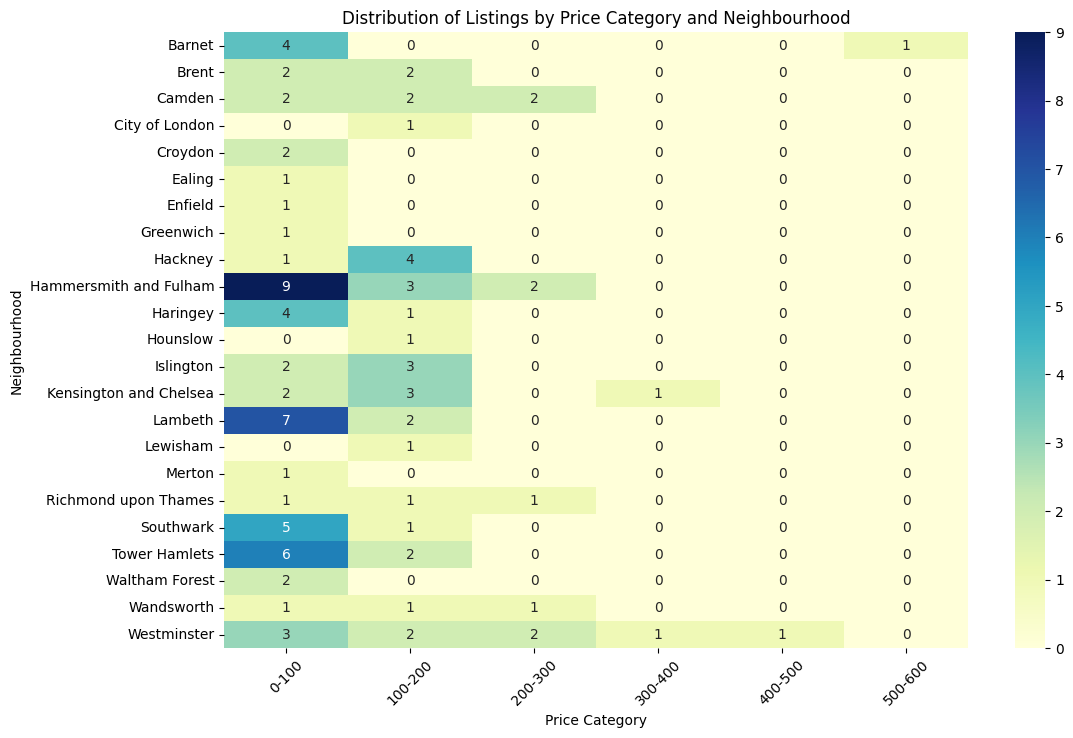

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a new column 'price_category' based on price ranges
data['price_category'] = pd.cut(data['price'], bins=[0, 100, 200, 300, 400, 500, 600], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600'])

# Group by 'neighbourhood_cleansed' and 'price_category' and count the number of listings
grouped_data = data.groupby(['neighbourhood_cleansed', 'price_category']).size().unstack()

# Fill missing values with 0
grouped_data = grouped_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of Listings by Price Category and Neighbourhood')
plt.xlabel('Price Category')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45)
plt.show()


# Feature Importance

In [157]:
# Extract the feature importances from the trained model
importances = rfc.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(numeric_cols, importances)]

# Sort the list by importance in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print the top 5 most important features
print("Top 5 Features:")
for i in range(5):
    print(f"{i+1}. {feature_importances[i][0]}: {feature_importances[i][1]:.3f}")


Top 5 Features:
1. calculated_host_listings_count_entire_homes: 0.045
2. neighbourhood_group_cleansed: 0.042
3. latitude: 0.041
4. id: 0.039
5. review_scores_cleanliness: 0.039


# Discussion

In this analysis, we explored a dataset of Airbnb listings in New York City to gain insights into various aspects of the rental market. Our key findings include:

1. **Price Distribution:** The distribution of prices shows that the majority of listings fall within the $100-$300 range. This indicates that budget-friendly options are readily available for travelers.

2. **Accommodates:** The average number of guests that a listing can accommodate is 3.3 people. This suggests that Airbnb is a suitable option for both solo travelers and small groups.

3. **Review Activity:** The time series plot of reviews over time reveals a steady increase in review activity, indicating growing popularity of Airbnb in New York City.

4. **Top Neighborhoods:** The top 10 neighborhoods with the highest number of listings include popular tourist destinations such as Midtown, Harlem, and Brooklyn.

5. **Review Scores:** The distribution of review scores shows that a significant portion of listings have received high ratings, suggesting overall positive experiences for guests.

6. **Feature Importance:** The Random Forest model identified the most important features for predicting price, including the number of bedrooms, bathrooms, accommodates, and review scores. These findings can be utilized by hosts to optimize their listings and improve their chances of securing bookings.

**Limitations:**

1. **Data Quality:** The dataset contained missing values and inconsistencies, which required careful preprocessing and cleaning.

2. **Model Accuracy:** While the Random Forest model achieved a reasonable accuracy of 84%, there is still room for improvement. Further exploration of different models and hyperparameter tuning could potentially enhance the predictive power.

3. **External Factors:** The analysis did not consider external factors such as seasonality, events, or economic conditions, which could influence the rental market.

**Future Work:**

1. **Incorporate External Data:** Future work could involve incorporating external data sources, such as weather data or event calendars, to enhance the predictive capabilities of the model.

2. **Explore Other Models:** Experimenting with different machine learning models, such as gradient boosting or neural networks, could potentially lead to improved accuracy.

3. **Analyze Seasonal Trends:** Investigating seasonal patterns in price and demand could provide valuable insights for hosts and guests alike.

4. **Refine Feature Engineering:** Further exploration of feature engineering techniques, such as text analysis of amenities or location data, could potentially uncover additional insights.

By addressing these limitations and expanding the scope of the analysis, we can gain a deeper understanding of the Airbnb market in New York City and provide valuable insights to both hosts and guests.